Q1 Make Trackbar for the following images to tune the parameters of canny
detection.

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1
3
6
11
18
26
38
50
63
77
92
106
119
132
145
150
1
3
5
12
19
31
46
63
82
100
120
138
150
1
2
4
9
15
23
33
45
59
76
93
112
131
149
150
1
3
7
12
20
31
45
62
79
97
115
133
150
You closed all windows


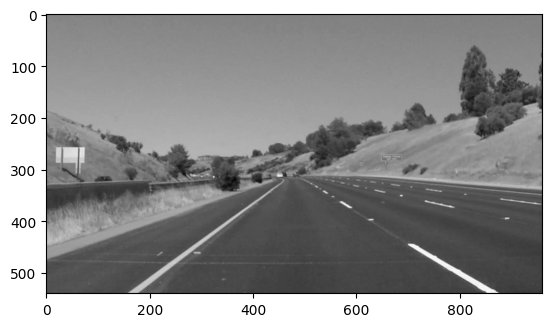

In [26]:

def nothing(x):
    print(x)

def convert_to_gray(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img1 = cv2.imread('solidWhiteCurve.jpg')
gray_1 = convert_to_gray(img1)
plt.imshow(gray_1, cmap='gray');  

img2 = cv2.imread('solidYellowCurve2.jpg')
gray_2 = convert_to_gray(img2)
plt.imshow(gray_2, cmap='gray');  

def find_edges(img,threshold_1,threshold_2):
  blur = cv2.GaussianBlur(img, (5,5), 0)
  return cv2.Canny(blur, threshold_1,threshold_2)

cv2.namedWindow('image 1')
cv2.namedWindow('image 2')

cv2.createTrackbar('threshold_1', 'image 1', 0, 150, nothing)
cv2.createTrackbar('threshold_2', 'image 1', 0, 150, nothing)
cv2.createTrackbar('threshold_1', 'image 2', 0, 150, nothing)
cv2.createTrackbar('threshold_2', 'image 2', 0, 150, nothing)
while 1:
    t1_img1 = cv2.getTrackbarPos('threshold_1', 'image 1')
    t2_img1 = cv2.getTrackbarPos('threshold_2', 'image 1')
    t1_img2 = cv2.getTrackbarPos('threshold_1', 'image 2')
    t2_img2 = cv2.getTrackbarPos('threshold_2', 'image 2')
    
    img1_edged = find_edges(img1, t1_img1, t2_img1)
    img2_edged = find_edges(img2, t1_img2, t2_img2)
    
    cv2.imshow('image 1', img1_edged)
    cv2.imshow('image 2', img2_edged)
    
    k = cv2.waitKey(1)
    if k == ord('q'):
        print('You closed all windows')
        break

cv2.destroyAllWindows() 

Q2 The out of question 1 make it as input for question 2 after make region of
interest then make trackbar for houghlines parameters (threshold ,min_line_length
max_line_gap
 and then draw 2 line on image.

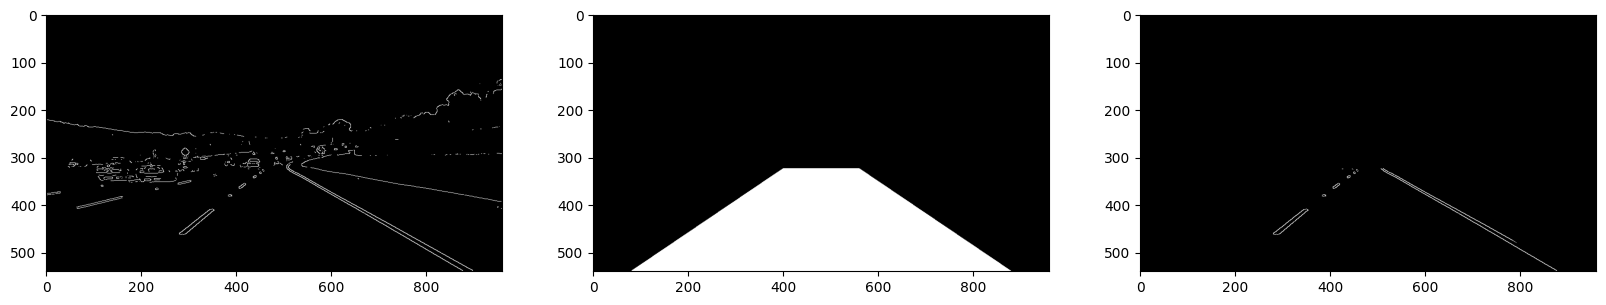

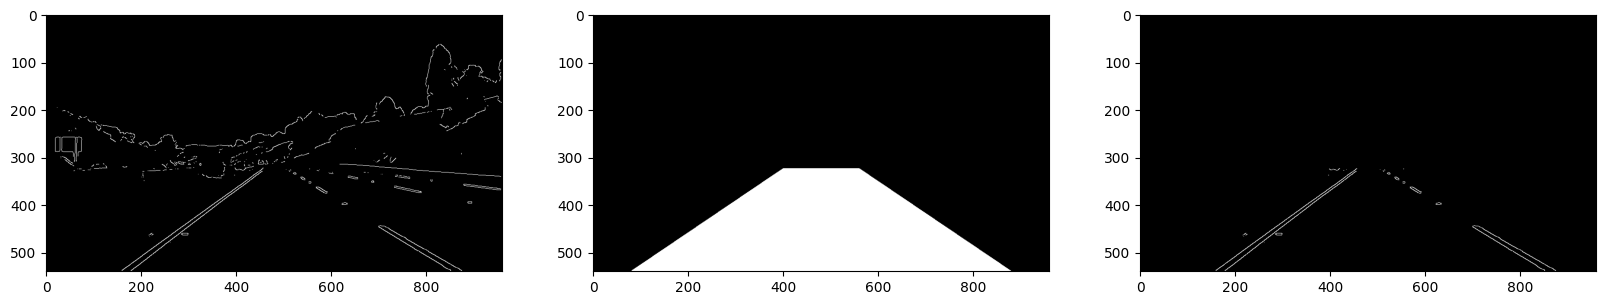

In [27]:

mask_1 = np.zeros_like(img1_edged)
vert = np.array(
  [
    [
      (int(mask_1.shape[1]*5/12), int(mask_1.shape[0]*3/5)),
      (int(mask_1.shape[1]*7/12), int(mask_1.shape[0]*3/5)),
      (int(mask_1.shape[1]*11/12), mask_1.shape[0]),
      (int(mask_1.shape[1]/12), mask_1.shape[0])
    ]
  ]
)
cv2.fillPoly(mask_1, vert, 255)
masked_1 = cv2.bitwise_and(img1_edged, mask_1)

fig1, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(img1_edged, cmap='gray')
ax1.imshow(mask_1, cmap='gray')
ax2.imshow(masked_1, cmap='gray');

mask_2 = np.zeros_like(img2_edged)
vert = np.array(
  [
    [
      (int(mask_2.shape[1]*5/12), int(mask_2.shape[0]*3/5)),
      (int(mask_2.shape[1]*7/12), int(mask_2.shape[0]*3/5)),
      (int(mask_2.shape[1]*11/12), mask_2.shape[0]),
      (int(mask_2.shape[1]/12), mask_2.shape[0])
    ]
  ]
)
cv2.fillPoly(mask_2, vert, 255)
masked_2 = cv2.bitwise_and(img2_edged, mask_1)

fig2, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(img2_edged, cmap='gray')
ax1.imshow(mask_2, cmap='gray')
ax2.imshow(masked_2, cmap='gray');



In [28]:
def mask_roi(img):
  mask = np.zeros_like(img1_edged)

  vert = np.array(
    [
      [
        (int(mask.shape[1]*5/12), int(mask.shape[0]*3/5)),
        (int(mask.shape[1]*7/12), int(mask.shape[0]*3/5)),
        (int(mask.shape[1]*11/12), mask.shape[0]),
        (int(mask.shape[1]/12), mask.shape[0])
      ]
    ]
  )
  cv2.fillPoly(mask, vert, 255)
  masked = cv2.bitwise_and(img1_edged, mask)
  return masked

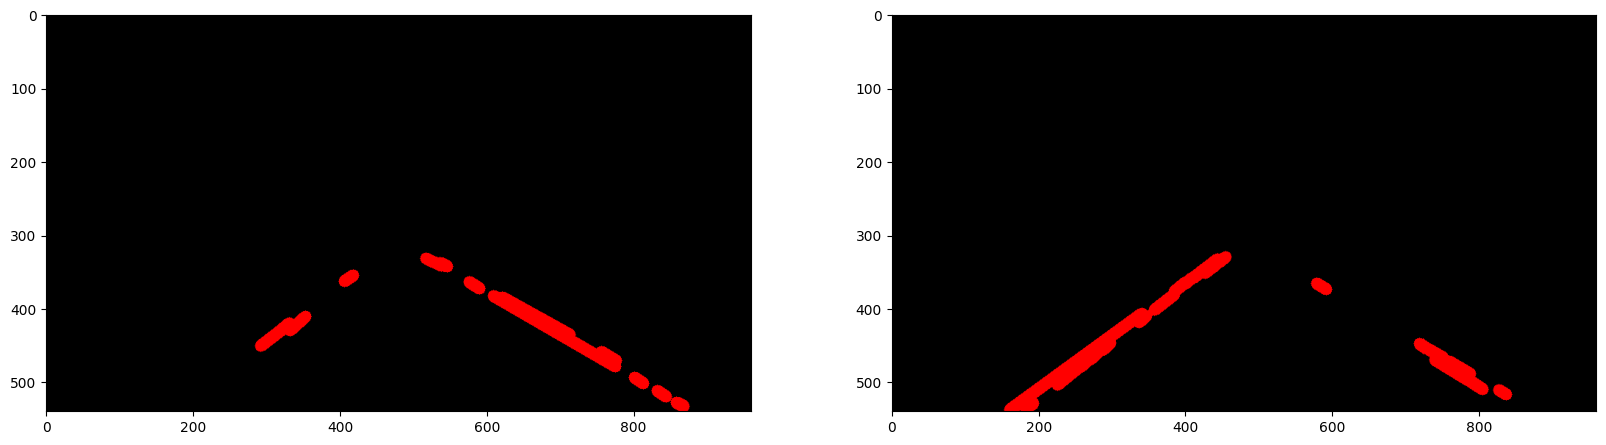

In [29]:
def hough_lines(img):
  return cv2.HoughLinesP(img, 4, np.pi/180, 10, 5, 10)

def draw_lines(img, lines):
  lines_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
  for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(lines_img, (x1, y1), (x2, y2), [255,0,0], 15)
  return lines_img

lines_1 = hough_lines(masked_1)
lined_img_1 = draw_lines(masked_1, lines_1)

lines_2 = hough_lines(masked_2)
lined_img_2 = draw_lines(masked_2, lines_2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(lined_img_1, cmap='gray')
ax1.imshow(lined_img_2, cmap='gray')



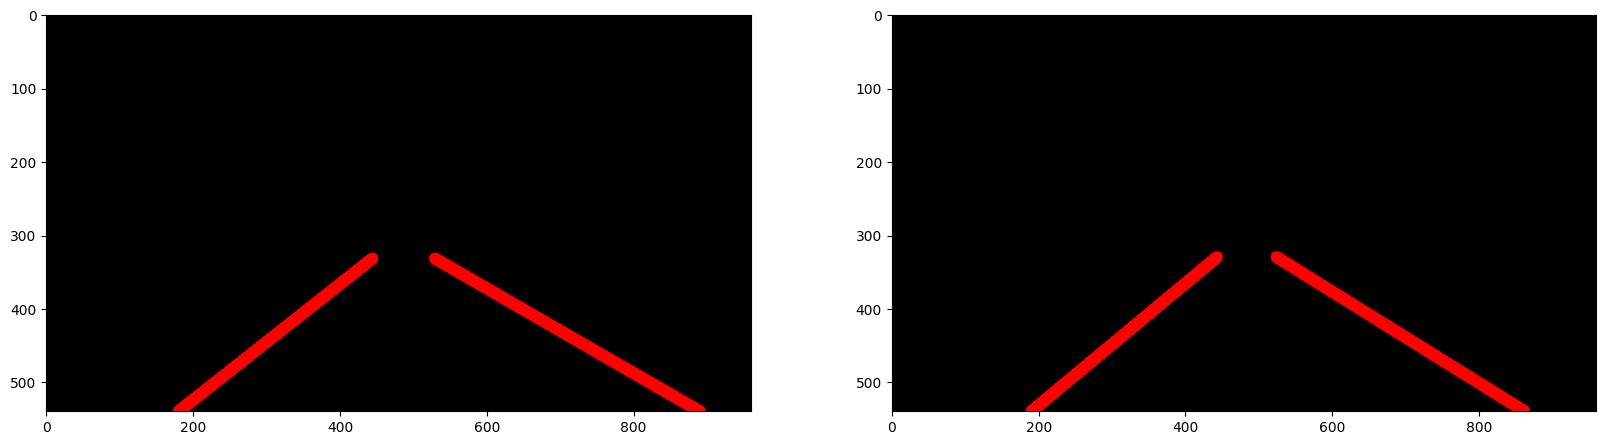

In [30]:
def formulate_lanes(lines, img):
  negative_slopes = []
  positive_slopes = []

  negative_intercepts = []
  positive_intercepts = []

  y_min = img.shape[0]
  y_max = img.shape[0]

  for line in lines:
    for x1, y1, x2, y2 in line:
      slope = (y2-y1) / (x2-x1)
      intercept = y2 - slope*x2

      y_min = min(y_min, y1, y2)

      if slope > 0.0:
        positive_slopes.append(slope)
        positive_intercepts.append(intercept)

      elif slope < 0.0:
        negative_slopes.append(slope)
        negative_intercepts.append(intercept)
  
  positive_slope = np.mean(positive_slopes)
  negative_slope = np.mean(negative_slopes)

  positive_intercept = np.mean(positive_intercepts)
  negative_intercept = np.mean(negative_intercepts)
  pts = [
    [[0,0, 0,0]],
    [[0,0, 0,0]]
  ]

  # +ve
  if len(positive_slopes) > 0:
    x_max = (y_max - positive_intercept) / positive_slope
    x_min = (y_min - positive_intercept) / positive_slope
    pts[0][0] = [x_min, y_min, x_max, y_max]
  
  if len(negative_slopes) > 0:
    x_max = (y_max - negative_intercept) / negative_slope
    x_min = (y_min - negative_intercept) / negative_slope
    pts[1][0] = [x_min, y_min, x_max, y_max]
  
  return np.array(pts, dtype=np.int32)

lane_1 = formulate_lanes(lines_1, masked_1)
lane_2 = formulate_lanes(lines_2, masked_1)

lanes_img1 = draw_lines(masked_1, lane_1)
lanes_img2 = draw_lines(masked_2, lane_2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(lanes_img1, cmap='gray')
ax1.imshow(lanes_img2, cmap='gray')


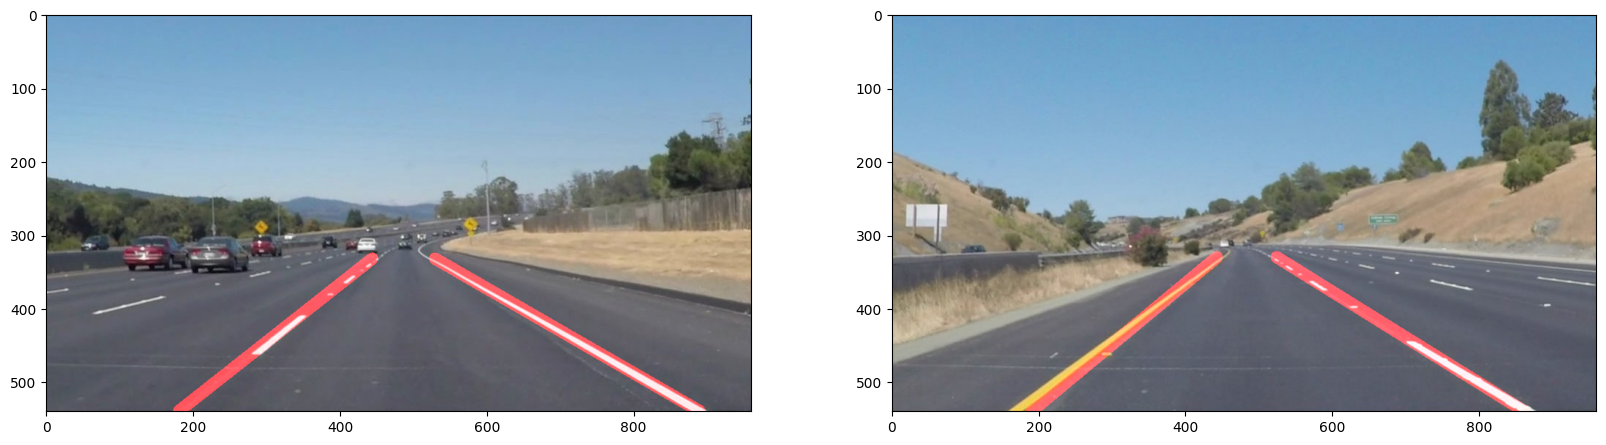

In [31]:
output_1 = cv2.addWeighted(img1[:,:,::-1], 1, lanes_img1, 1, 0)
output_2 = cv2.addWeighted(img2[:,:,::-1], 1, lanes_img2, 1, 0)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(output_1)
ax1.imshow(output_2)


In [32]:
def process_image(img):
  gray = convert_to_gray(img)
  edges = find_edges(gray, 150, 150)
  masked = mask_roi(edges)
  lines = hough_lines(masked)
  lanes = formulate_lanes(lines, masked)
  lined_img = draw_lines(masked, lanes)
  output = cv2.addWeighted(img, 1, lined_img, 1, 0)
  return output

Q3 read the following video and apply lane line detection on it then show output
using opencv.

In [33]:

from IPython.display import HTML

input_path = 'solidWhiteRight.mp4'
output_path = 'solidWhiteRight.mp4'

HTML(f"""
     <video width="960" height="540" controls>
      <source src="{input_path}">
     </ video>
""")

In [34]:
from moviepy.editor import VideoFileClip

input_video = VideoFileClip(input_path)
output_video = input_video.fl_image(process_image)
output_video.write_videofile(output_path, audio=False)
HTML(f"""
     <video width="960" height="540" controls>
      <source src="{output_path}">
     </ video>
""")

Moviepy - Building video hello/solidWhiteRight.mp4.
Moviepy - Writing video hello/solidWhiteRight.mp4


Moviepy - Done !
Moviepy - video ready hello/solidWhiteRight.mp4
